In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler    # Herramientas de polinomios

# Paquetes para clustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from formulaic import model_matrix

from statistics import mode

In [3]:
p1 = pd.read_csv('p7-data1.csv')
p2 = pd.read_csv('p7-data2.csv')

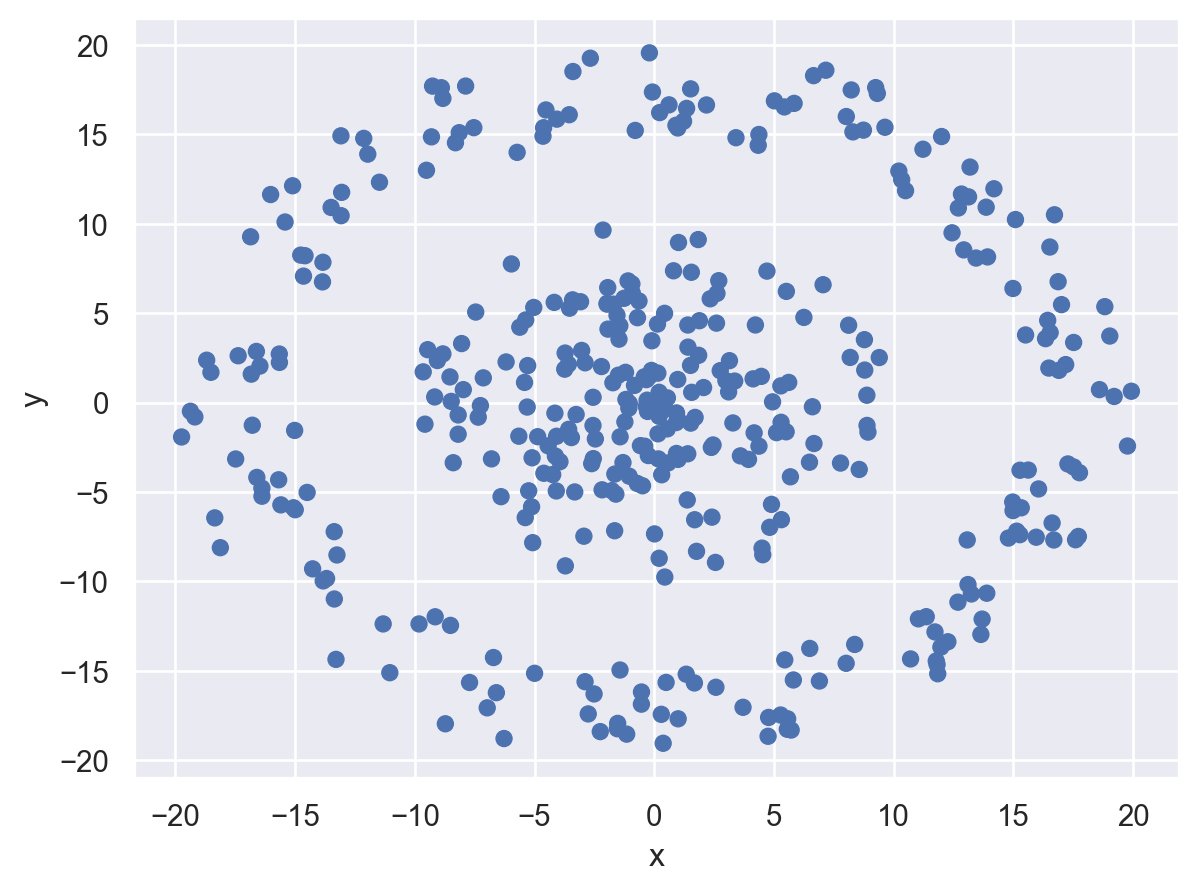

In [4]:
(
    so.Plot(data=p1, x='x', y='y')
    .add(so.Dot())
)

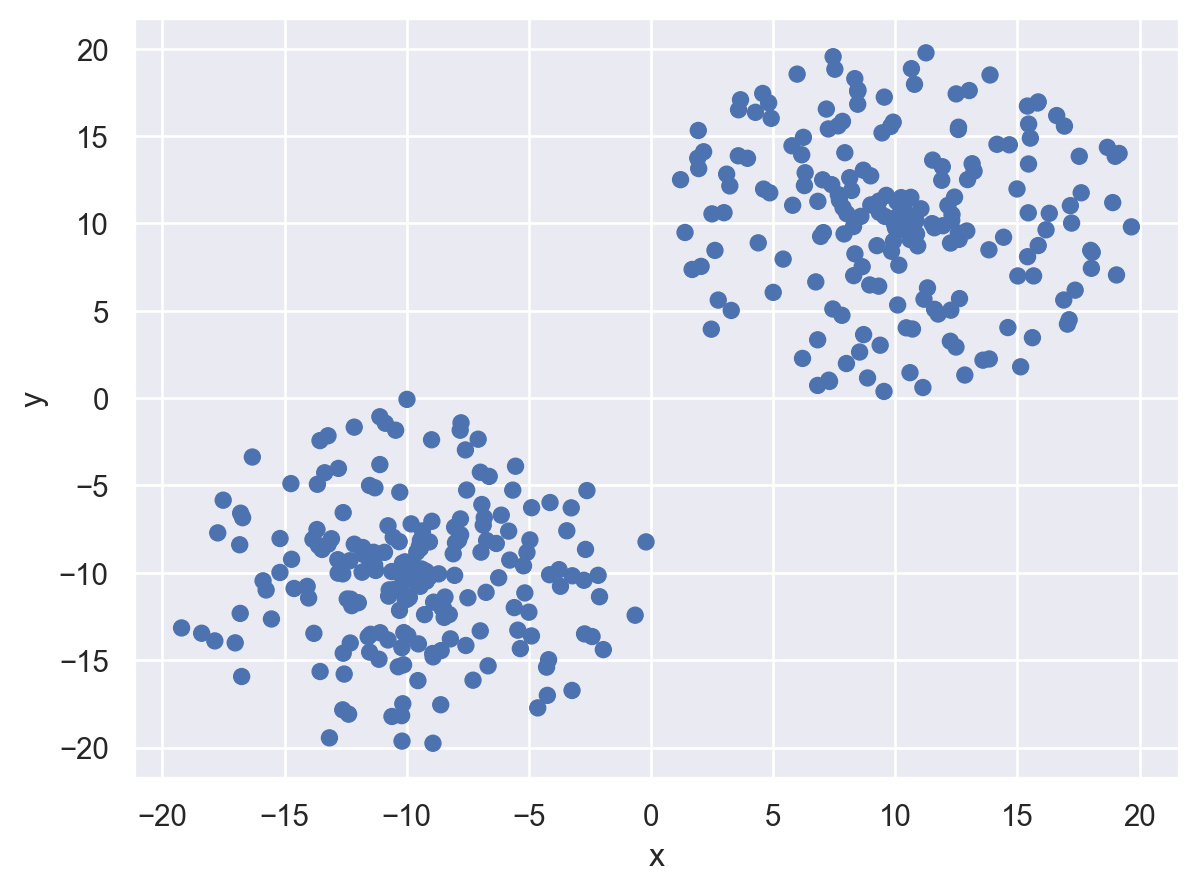

In [5]:
(
    so.Plot(data=p2, x='x', y='y')
    .add(so.Dot())
)

In [6]:
kmeans = KMeans(n_clusters = 2)

etiquetas1 = kmeans.fit_predict(p1)
etiquetas2 = kmeans.fit_predict(p2)

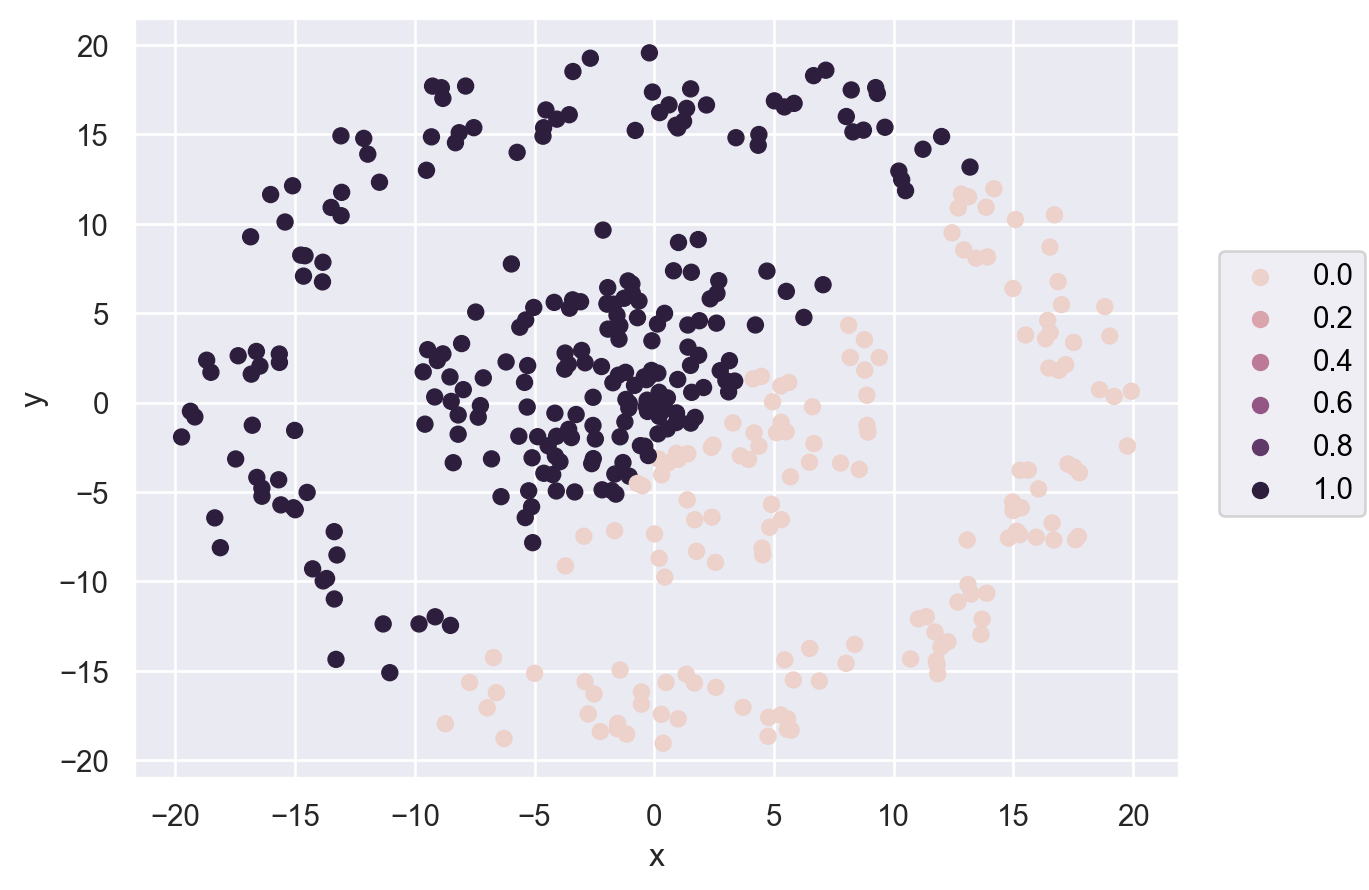

In [7]:
(
    so.Plot(data=p1, x='x', y='y', color = etiquetas1)
    .add(so.Dot())
)

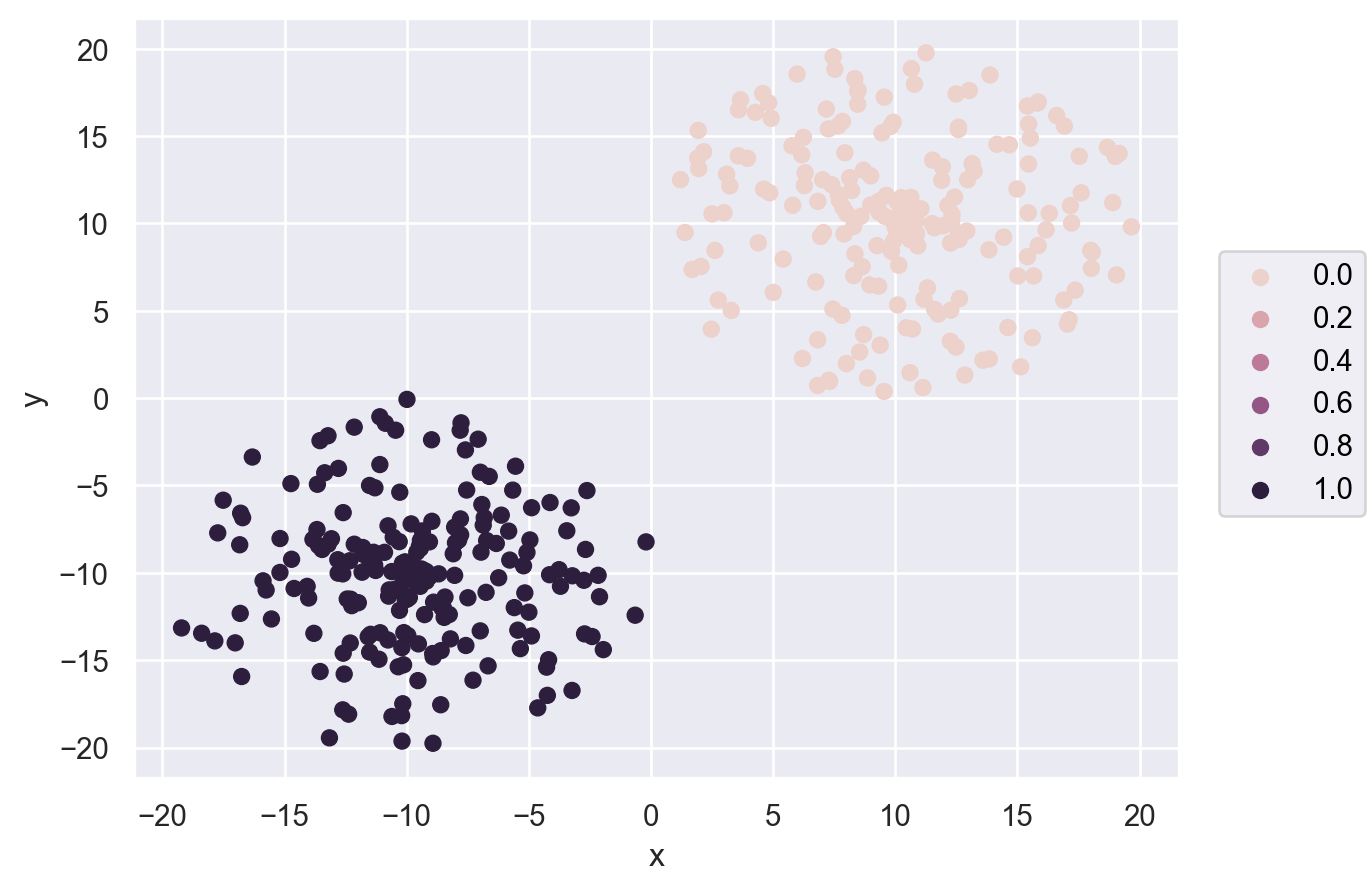

In [8]:
(
    so.Plot(data=p2, x='x', y='y', color = etiquetas2)
    .add(so.Dot())
)

In [9]:
pi = pd.read_csv('p7-iris.txt', delimiter='\t')
pi

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


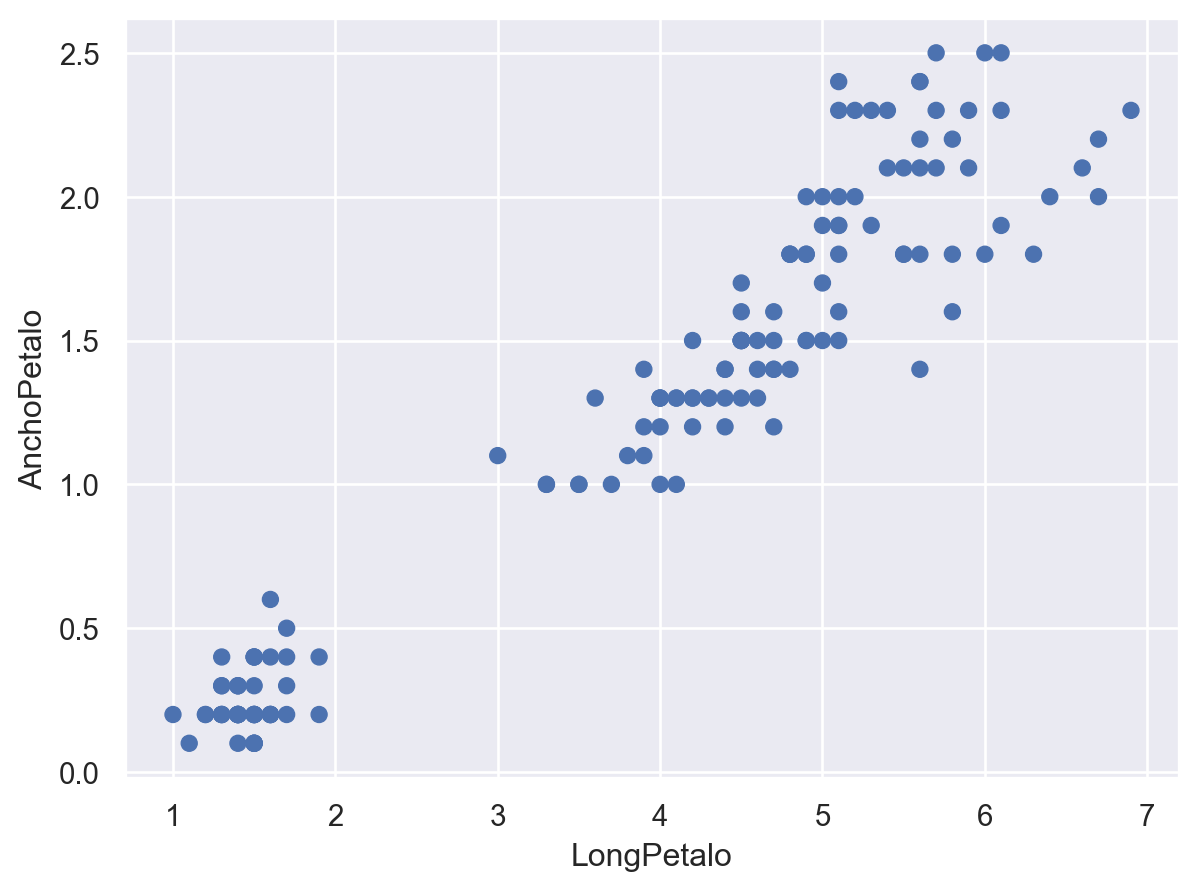

In [10]:
(
    so.Plot(data = pi, x = 'LongPetalo', y = 'AnchoPetalo')
    .add(so.Dot())
)

In [11]:
kmeans = KMeans(n_clusters = 3)

etiquetas = kmeans.fit_predict(pi)

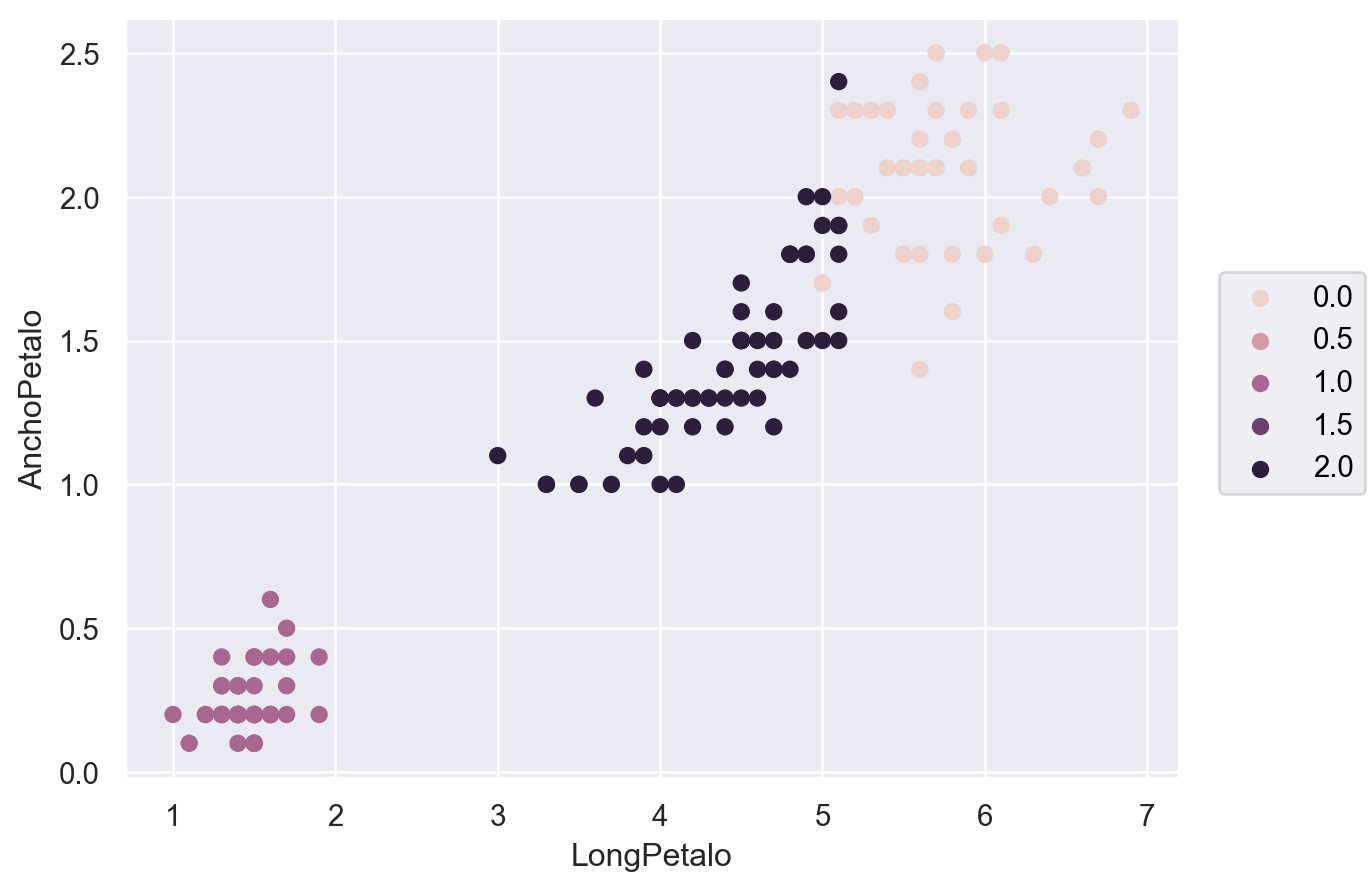

In [12]:
(
    so.Plot(data=pi, x='LongPetalo', y='AnchoPetalo', color = etiquetas)
    .add(so.Dot())
)

In [13]:
pi.columns

Index(['LongSepalo', 'AnchoSepalo', 'LongPetalo', 'AnchoPetalo'], dtype='object')

In [14]:
ui = pd.DataFrame(columns = ['LongSepalo', 'AnchoSepalo', 'LongPetalo', 'AnchoPetalo'])

for i in range(0,3,1):
    ui = pd.concat([ui,pd.DataFrame(pi[etiquetas == i].sum()/len(pi[etiquetas == i])).transpose()], ignore_index = True)

ui 

C:\Users\bravo\AppData\Local\Temp\ipykernel_19556\4034938816.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ui = pd.concat([ui,pd.DataFrame(pi[etiquetas == i].sum()/len(pi[etiquetas == i])).transpose()], ignore_index = True)


,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.418000,1.464000,0.244000
2,5.901613,2.748387,4.393548,1.433871


In [15]:
wcss = 0


for i in range(0,3,1):
    wcss += np.sqrt(((pi[etiquetas == i] - ui.iloc[i]).transpose()**2).sum()).sum()

wcss

97.32592423430009

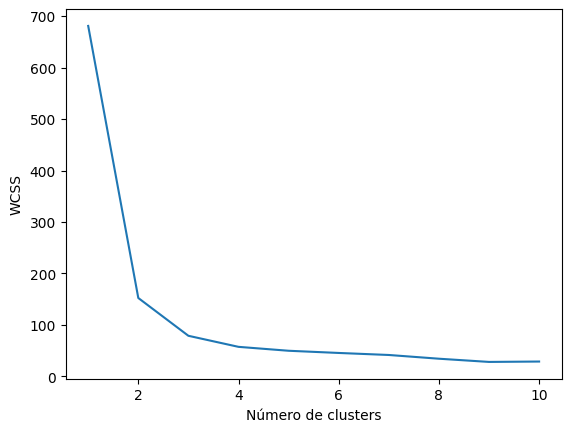

In [16]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    cluster = kmeans.fit_predict(pi)
    wcss.append(kmeans.inertia_)
    
# Graficamos los resultados en un gráfico, y observamos en qué valor de k se da el "codo"
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # within cluster sum of squares (suma de cuadrados en cada cluster)
plt.show()

In [17]:
pe = pd.read_csv('p7-dataSinEscalar.csv')
pe.columns

Index(['x', ' y'], dtype='object')

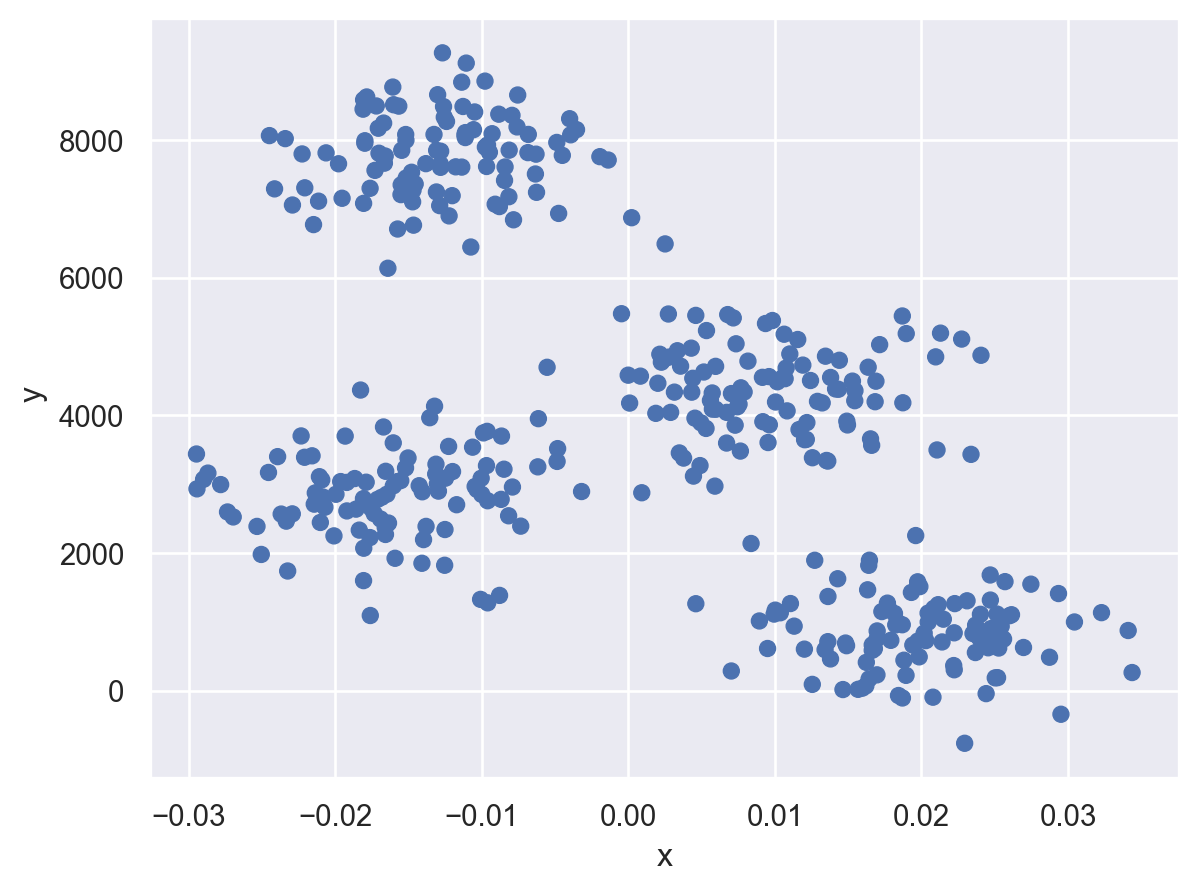

In [18]:
(
    so.Plot(data=pe, x='x', y=' y')
    .add(so.Dot())
)

In [19]:
kmeans = KMeans(n_clusters = 4)

etiquetas = kmeans.fit_predict(pe)

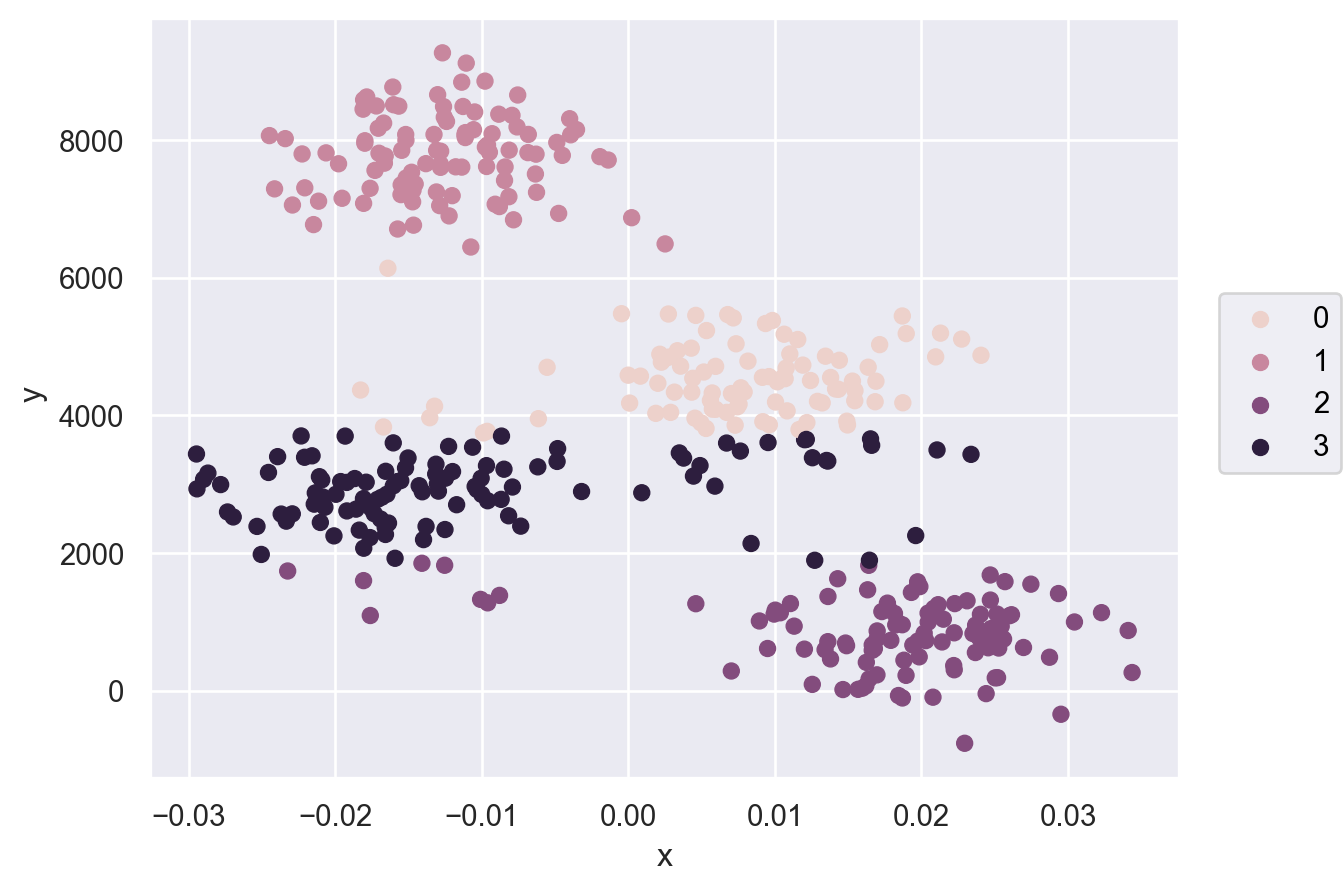

In [20]:
(
    so.Plot(data=pe, x='x', y=' y', color=etiquetas)
    .add(so.Dot())
)

In [21]:
pe = (pe - pe.min())/(pe.max() - pe.min())

etiquetas = kmeans.fit_predict(pe)

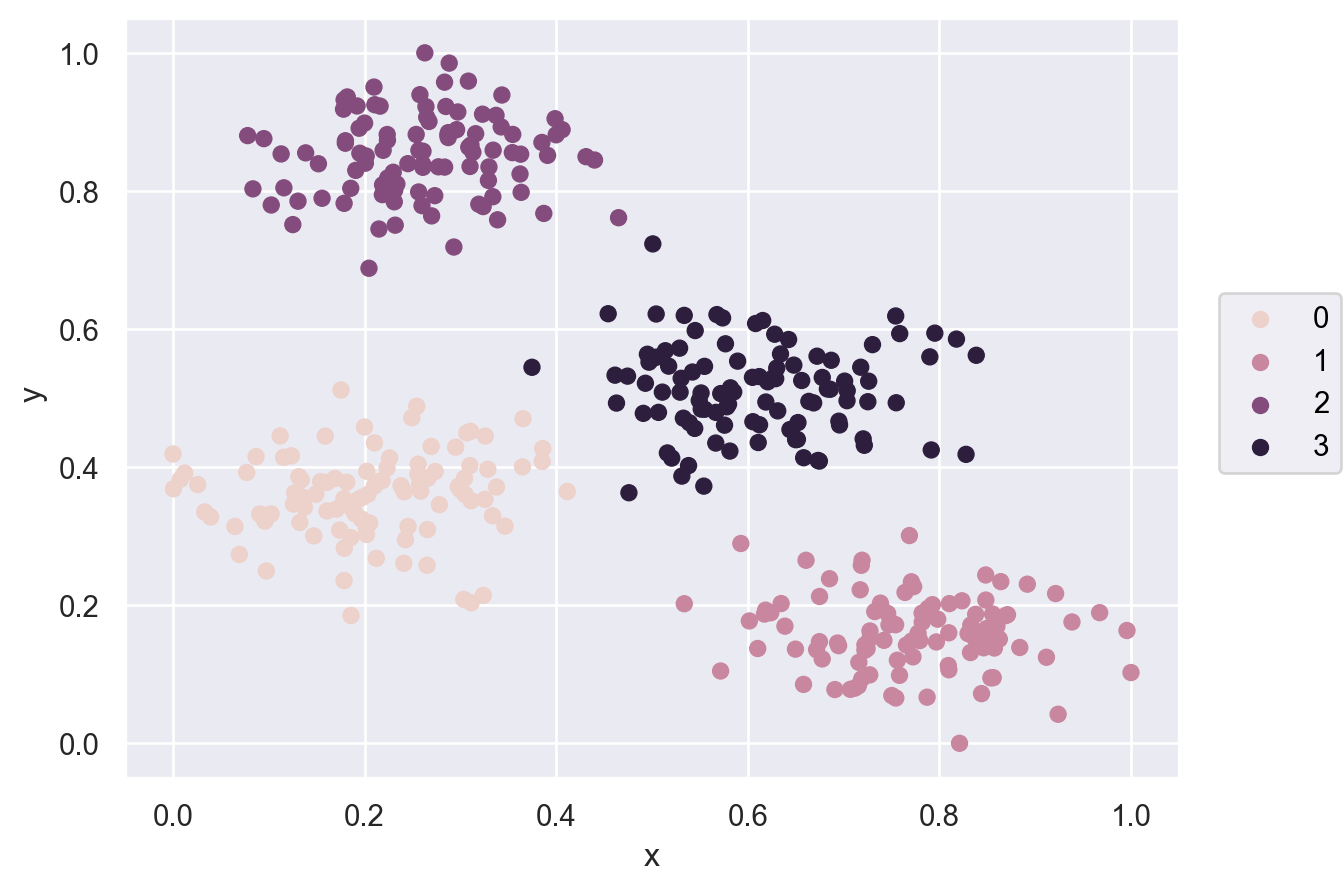

In [22]:
(
    so.Plot(data=pe, x='x', y=' y', color = etiquetas)
    .add(so.Dot())
)

Veamos de nuevo con DBSCAN

In [23]:
clustering1 = DBSCAN(eps=5, min_samples=5)
etiqueta1 = clustering1.fit_predict(p1)
etiqueta1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

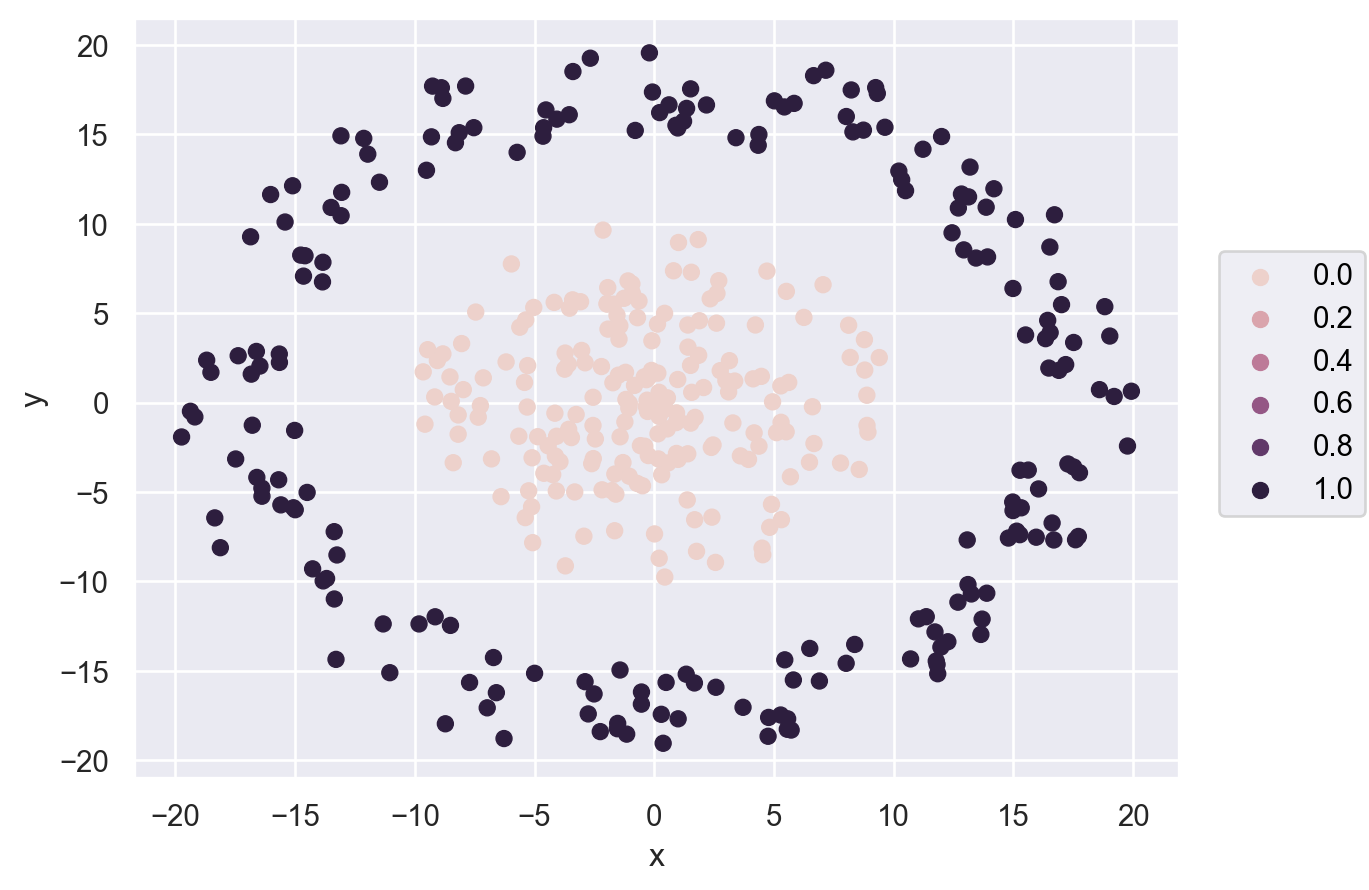

In [24]:
(
    so.Plot(data=p1, x='x', y='y', color = etiqueta1)
    .add(so.Dot())
)

In [25]:
clustering2 = DBSCAN(eps=5, min_samples=10)
etiqueta2 = clustering2.fit_predict(p2)
etiqueta2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

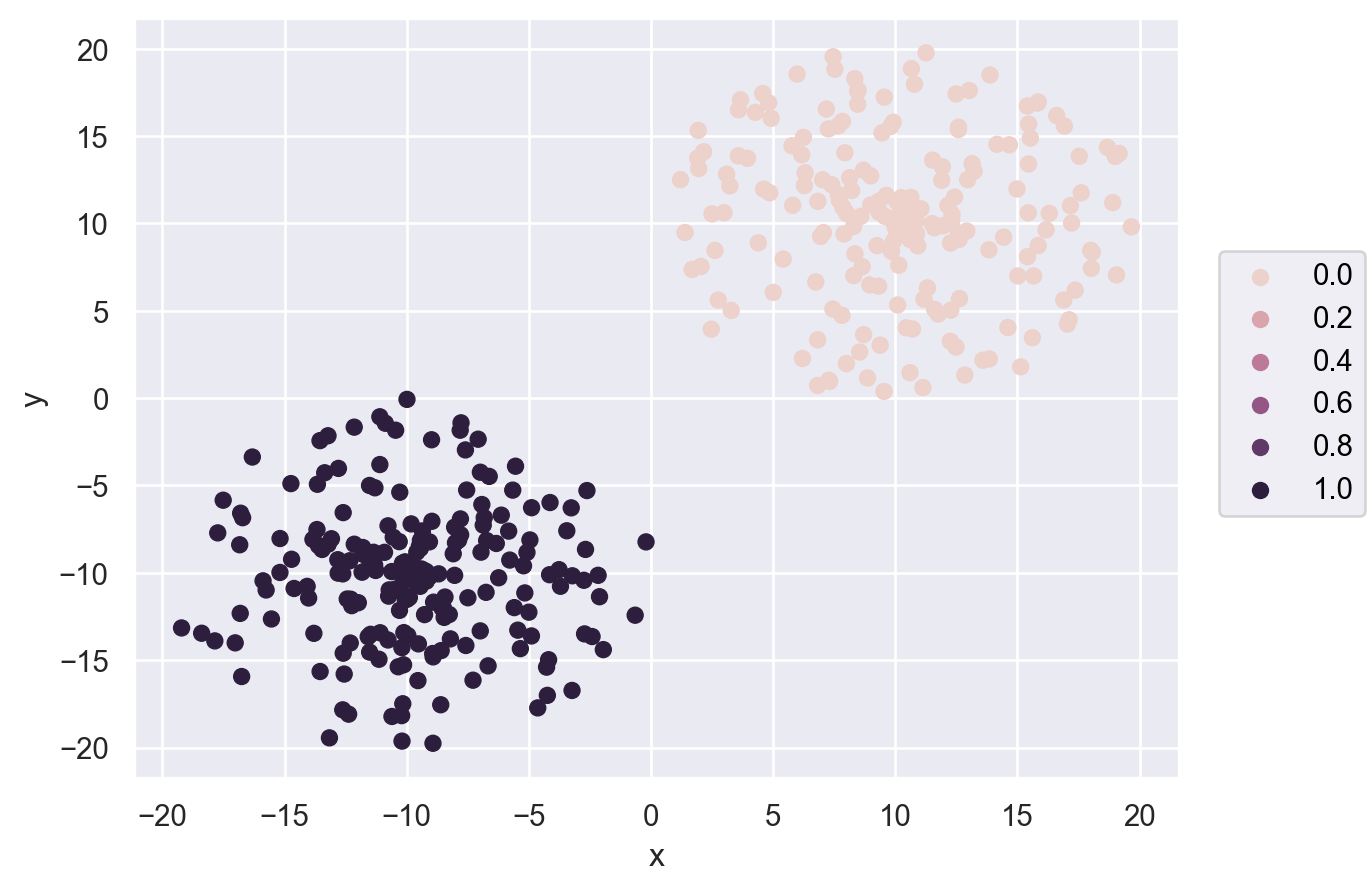

In [26]:
(
    so.Plot(data=p2, x='x', y='y', color = etiqueta2)
    .add(so.Dot())
)

In [27]:
clustering3 = DBSCAN(eps=0.6, min_samples=10)
etiqueta3 = clustering3.fit_predict(pi)
etiqueta3

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

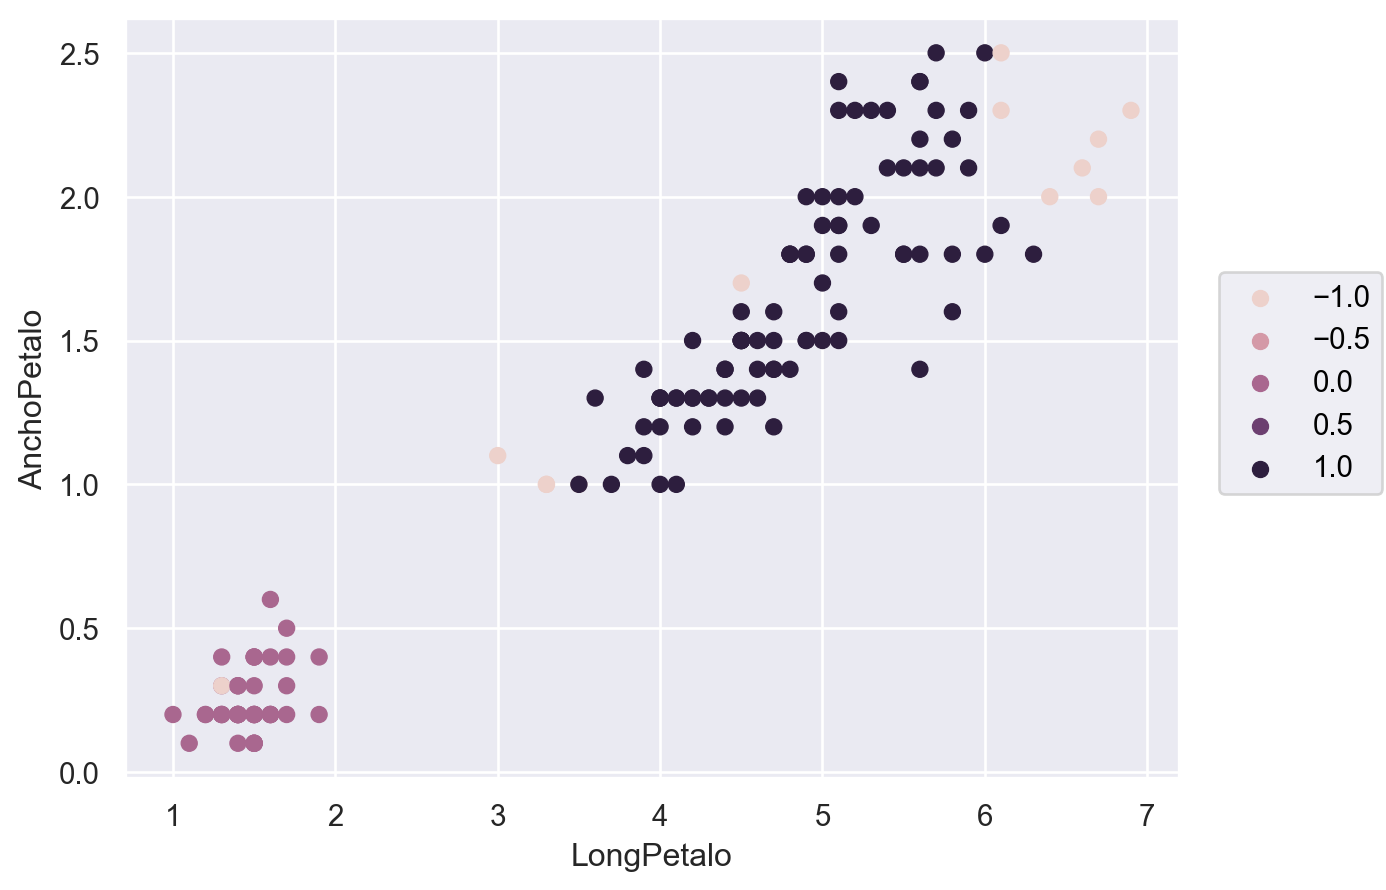

In [28]:
(
    so.Plot(data=pi, x='LongPetalo', y='AnchoPetalo', color = etiqueta3)
    .add(so.Dot())
)

In [29]:
clustering4 = DBSCAN(eps=0.1, min_samples=10)
etiqueta4 = clustering4.fit_predict(pe)
etiqueta4

array([-1,  0,  0,  1,  0,  2,  3,  1,  0,  3,  2,  3, -1,  0,  0,  3,  0,
        3,  1,  0,  0,  0,  2,  1,  1,  2,  2,  1,  1,  3,  1,  1,  0,  1,
        0,  2,  3,  1,  3,  1,  0,  2,  3,  1,  3,  2,  3,  3,  3,  2,  2,
        2,  0,  2,  2,  0,  1,  3,  3,  0,  3,  3,  3,  3,  1,  0,  3,  0,
        0,  2,  0,  1,  0,  2,  3,  0,  1,  0,  2,  0,  0,  1,  3,  2,  1,
        0,  0,  1,  0,  3,  0,  3,  1,  0,  0,  2,  1,  3,  3,  3,  2,  3,
        1,  1,  0,  2,  1,  2,  3,  0,  0,  0,  1,  0,  2,  3,  2,  0,  2,
        2,  1,  0,  3,  2,  1,  2,  3,  3,  3,  1,  2,  2,  2,  0,  1,  0,
        2,  1,  2,  0,  1,  0,  0,  2,  0,  3,  1,  0,  3,  0,  3,  1,  3,
        1,  2,  0,  3,  0,  0,  0,  1,  0,  2,  0,  0,  2,  3,  3,  0,  2,
        2,  2,  2,  3,  3,  3,  1,  0,  1,  2,  1,  2,  0,  1,  2,  0,  2,
        1,  1,  2,  1,  1,  2,  0,  2,  2,  2,  3,  3,  1,  1,  0,  3,  3,
        2,  1,  0,  2,  1,  2,  1,  1,  3,  3,  2,  3,  1,  2,  3,  2,  0,
        1,  2,  0,  0,  0

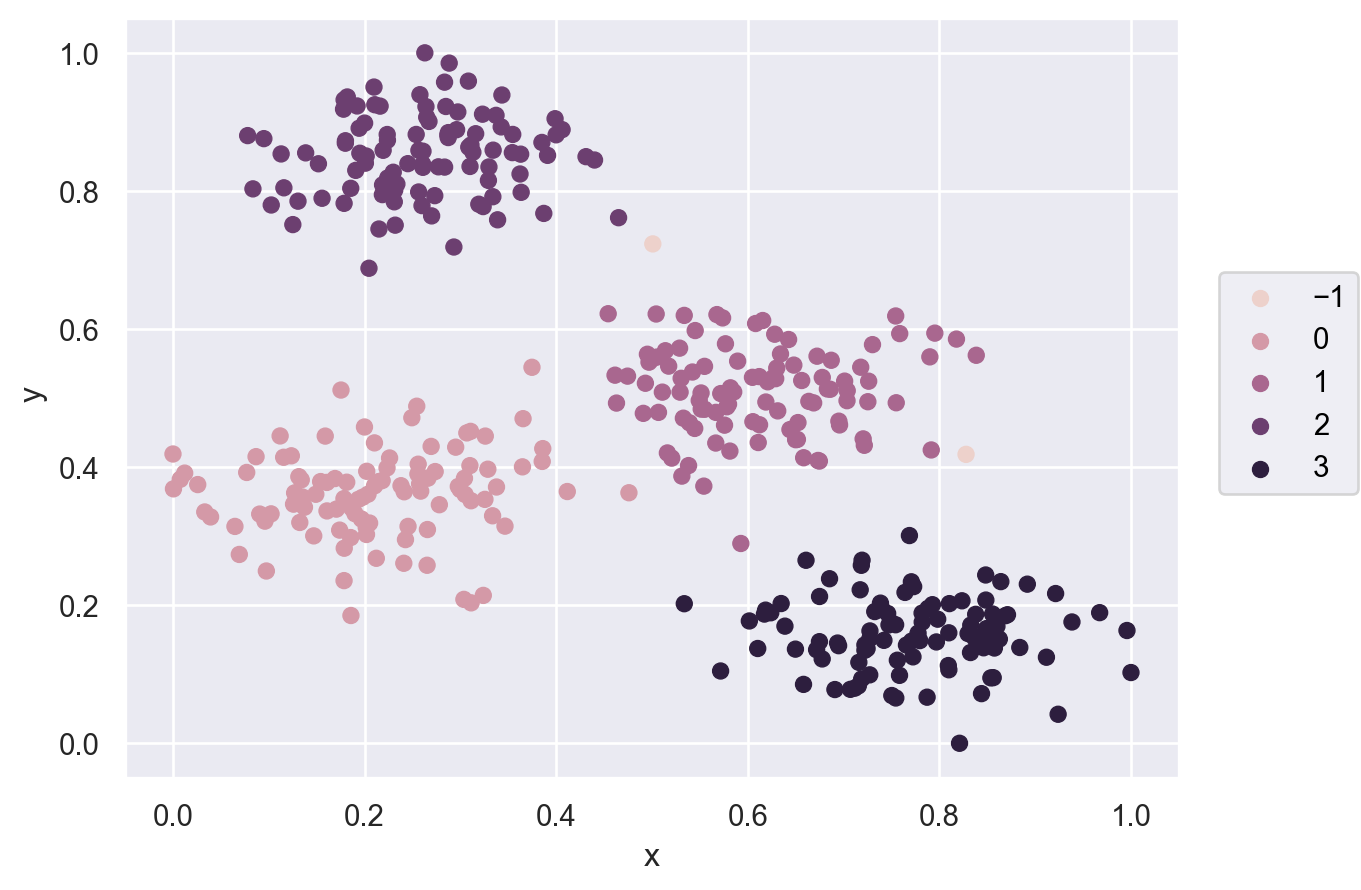

In [30]:
(
    so.Plot(data=pe, x='x', y=' y', color = etiqueta4)
    .add(so.Dot())
)

In [31]:
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [32]:
penguins[["bill_length_mm", "flipper_length_mm"]] = MinMaxScaler().fit_transform(penguins[["bill_length_mm", "flipper_length_mm"]])
datos = penguins[["bill_length_mm", "flipper_length_mm"]]

In [33]:
K = 9
ind = 1
neighbors = NearestNeighbors(n_neighbors=K+1) 
neighbors.fit(datos)

distances, indices = neighbors.kneighbors(datos.iloc[[ind]])

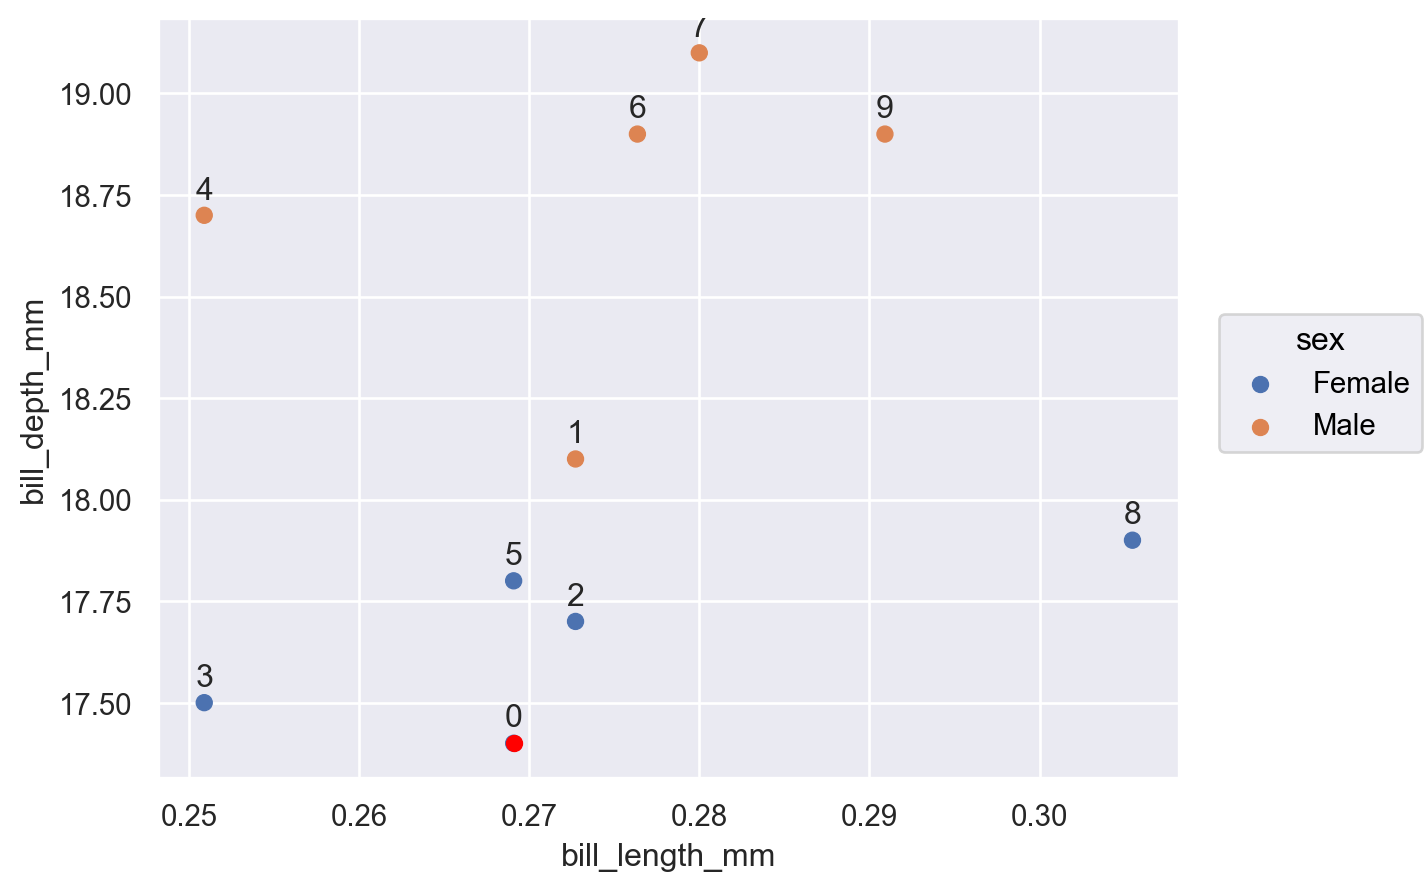

In [34]:
(
    so.Plot(data = penguins.iloc[indices.flatten()], x = "bill_length_mm", y = "bill_depth_mm",  text = np.arange(K+1).astype(str))
    .add(so.Text(valign = "bottom"))
    .add(so.Dot(), color = "sex")
    .add(so.Dot(color = "red"), data = penguins.iloc[[ind]], x = "bill_length_mm", y = "bill_depth_mm")
)

In [35]:
mode(penguins['sex'][indices.flatten()])

'Female'

In [36]:
def mas_votado(datos, categorias, ind, K):
    neighbors = NearestNeighbors(n_neighbors= K) 
    neighbors.fit(datos.drop([ind]))

    distances, indices = neighbors.kneighbors(datos.iloc[[ind]])
    votos = categorias[indices.flatten()]

    return(mode(votos))

In [37]:
def knn_leave_one_out(datos, categorias, K):
    correctos = 0
    total = len(datos)
    for ind in range(total):
        prediccion = mas_votado(datos, categorias, ind, K)
        if(categorias[ind] == prediccion):
            correctos += 1
    return(correctos / total)

In [38]:
knn_leave_one_out(datos, penguins['sex'], 9)

0.5195195195195195

In [39]:
acierto = []

for K in range(1,30,2):
    aciertos = knn_leave_one_out(datos, penguins['sex'], K)
    acierto.append(aciertos)

In [40]:
for i in range(len(acierto)):
    if acierto[i] == max(acierto):
        res = i

print("La mejor proporcion de aciertos es:",max(acierto))
print("El mejor k es:", 2*res+1)

La mejor proporcion de aciertos es: 0.5555555555555556
El mejor k es: 3


Para el segundo caso hagamos mas pro, propongamos un modelo, separemos en datos de entrenamiento y testeo y veamos la performance de cada uno de los modelos

In [41]:
X = penguins.drop(['sex'], axis = 1)
y = penguins['sex']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [43]:
formula1 = '~ bill_length_mm + flipper_length_mm + body_mass_g'
X1_train = model_matrix(formula1, X_train)
X1_test = model_matrix(formula1, X_test)
X1_train = MinMaxScaler().set_output(transform = 'pandas').fit_transform(X1_train)
X1_test = MinMaxScaler().set_output(transform = 'pandas').fit_transform(X1_test)

In [44]:
neighbor = KNeighborsClassifier(n_neighbors=9)
neighbor.fit(X1_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [45]:
y_pred = neighbor.predict(X1_test)
y_pred

array(['Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Male'], dtype=object)

In [46]:
print(accuracy_score(y_test,y_pred))

0.7164179104477612


In [47]:
acierto = []

for K in range(1,30,2):
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X1_train,y_train)
    y_pred = neighbor.predict(X1_test)
    acierto.append(accuracy_score(y_test,y_pred))

In [48]:
for i in range(len(acierto)):
    if acierto[i] == max(acierto):
        res = i

print("La mejor proporcion de aciertos es:",max(acierto))
print("El mejor k es:", 2*res+1)

La mejor proporcion de aciertos es: 0.7611940298507462
El mejor k es: 29


In [49]:
neighbor = KNeighborsClassifier(n_neighbors=29)
neighbor.fit(X1_train, y_train)
y_pred = neighbor.predict(X1_test)

C = confusion_matrix(y_test,y_pred)
display(C)

array([[20, 11],
       [ 5, 31]], dtype=int64)

In [50]:
formula2 = '~ bill_depth_mm + flipper_length_mm + body_mass_g'
X2_train = model_matrix(formula2, X_train)
X2_test = model_matrix(formula2, X_test)
X2_train = MinMaxScaler().set_output(transform = 'pandas').fit_transform(X2_train)
X2_test = MinMaxScaler().set_output(transform = 'pandas').fit_transform(X2_test)

In [51]:
acierto = []

for K in range(1,30,2):
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X2_train,y_train)
    y_pred = neighbor.predict(X2_test)
    acierto.append(accuracy_score(y_test,y_pred))

In [52]:
for i in range(len(acierto)):
    if acierto[i] == max(acierto):
        res = i

print("La mejor proporcion de aciertos es:",max(acierto))
print("El mejor k es:", 2*res+1)

La mejor proporcion de aciertos es: 0.8955223880597015
El mejor k es: 25


In [53]:
neighbor = KNeighborsClassifier(n_neighbors=25)
neighbor.fit(X2_train, y_train)
y_pred = neighbor.predict(X2_test)

C = confusion_matrix(y_test,y_pred)
display(C)

array([[25,  6],
       [ 1, 35]], dtype=int64)

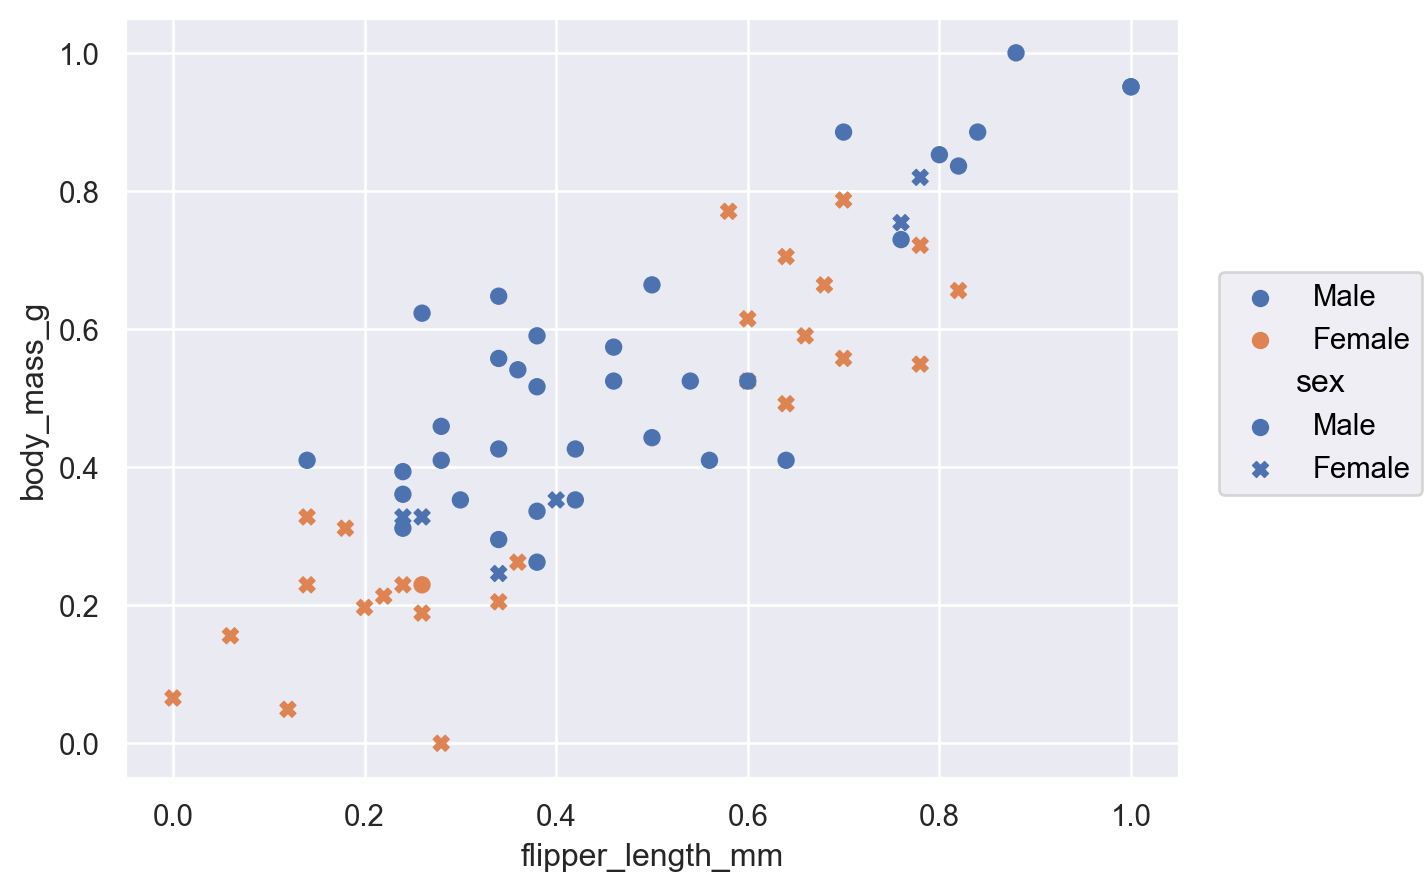

In [54]:
(
    so.Plot(data = pd.concat([X2_test, y_test], axis = 1), x = 'flipper_length_mm', y = 'body_mass_g', color = y_pred, marker = 'sex')
    .add(so.Dot())
)

In [69]:
{x : penguins[penguins['island'] == x]['body_mass_g'].std() for x in penguins.island.unique()}

{'Torgersen': 451.8463509694045,
 'Biscoe': 790.8600693688636,
 'Dream': 412.935580548016}